# Individuals
- The base unit of an evolutionary algorithm (EA) is the individual.
- An individual represents a single solution to the problem we want to solve.
- Classic EAs often have binary individuals, where each gene is represented by a bit (0/1 value).

In [1]:
import numpy as np

In [2]:
class Individual:
    def __init__(self, n: int):
        self.genes = np.random.randint(0, 2, (n,))
        self.fitness = -np.inf
    def __str__(self):
        return f'(Ind: {self.genes}, {self.fitness})'
    def __repr__(self):
        return str(self)


- Individual has binary genes and an integer fitness.
- A newly-initialized individual often has random genes.

In [3]:
ind = Individual(10)
ind


(Ind: [1 1 1 1 1 0 0 1 0 0], -inf)

# Objectives
- The objective function gives a value to our individual.
- The objective function can be designed so that it can evaluate the individual.
- The objective function value of an individual is often called the fitness value of that individual.
- The objective function does not need to be differentiable or continuous.

In [4]:
def onemax(i: Individual):
    return np.sum(i.genes)


The OneMax function simply adds all the bits of the genotype of the individual.

In [5]:
ind.fitness = onemax(ind)
ind

(Ind: [1 1 1 1 1 0 0 1 0 0], 6)

The optimal solution for OneMax is the individual that has the genotype of all 1s.


To be more general, we often define an evaluate function, which evaluate the fitness value of an individual.



In [6]:
def evaluate(ind: Individual, objective):
    ind.fitness = objective(ind)

evaluate(ind, onemax)
ind


(Ind: [1 1 1 1 1 0 0 1 0 0], 6)

- Each time we evaluate the fitness value of an individual, we spend one evaluation function call.
- To be abstract from the exact runtime on specific hardware, we often use the number of evaluations as the computing cost/budget for EAs.


# (1+1) Evolutionary Algorithm ~~~ (1+1)-EA

In [7]:
n = 20

In [8]:
parent = Individual(n)
evaluate(parent, onemax)
parent


(Ind: [0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1], 10)

In [9]:
def mutate(ind: Individual, mutation_rate=1.0/len(ind.genes)):
    new_genes = np.copy(ind.genes)
    for i in range(len(new_genes)):
        if np.random.rand() < mutation_rate:
            new_genes[i] = not ind.genes[i]
    child = Individual(len(ind.genes))
    child.genes = new_genes
    return child


- The mutate function create a child/offspring individual from a parent individual with the mutation probability of p = 1/n 
- We scan through each gene in an individual.
- For each gene, we generate a random number r∈(0,1).
- If r<p, we flip the gene value 0↔1.


In [10]:
child = mutate(parent)
print("Parent :", parent)
print("Child  :", child)
print("Genes :", parent.genes == child.genes)


Parent : (Ind: [0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1], 10)
Child  : (Ind: [0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1], -inf)
Genes : [ True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True  True  True  True]


- Running this mutation function a few times.
- Each time, only one or two genes change because the mutation rate is set to p = 1/n  

In [11]:
child = mutate(parent)
print("Parent :", parent)
print("Child  :", child)
print("Genes :", parent.genes == child.genes)


Parent : (Ind: [0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1], 10)
Child  : (Ind: [0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0], -inf)
Genes : [ True  True  True  True  True  True False  True  True  True  True False
  True  True False  True  True  True  True False]


In [12]:
child = mutate(parent)
print("Parent :", parent)
print("Child  :", child)
print("Genes :", parent.genes == child.genes)


Parent : (Ind: [0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1], 10)
Child  : (Ind: [0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1], -inf)
Genes : [ True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True]


Each time, we replace the parent individual x by the child individual x′ if the fitness of the offspring is better, i.e., f(x′)≥f(x).


In [13]:
evaluate(child, onemax)
print(parent.fitness)
print(child.fitness)
if child.fitness >= parent.fitness:
    parent = child
parent.fitness


10
7


10

- We simply run this mutation step over and over until we reach the solution we want or the certain termination criterion is met (e.g., the maximum number of evaluations are all spent).
- Let's just run for a few iterations.


In [14]:
parent = Individual(n)
for i in range(20):
    child = mutate(parent)
    evaluate(child, onemax)
    if child.fitness >= parent.fitness:
        parent = child
    # print(i, " ", parent.fitness)


print(parent.fitness, " / ", n)

17  /  20


- Let's code the (1+1)-EA.


In [15]:
from tqdm import tqdm

def one_plus_one(ind_length: int, num_generations: int, objective):
    fits = np.zeros(num_generations)
    parent = Individual(ind_length)
    evaluate(parent, objective)
    
    for i in tqdm(range(len(fits))):
        child = mutate(parent)
        evaluate(child, objective)

        if child.fitness >= parent.fitness:
            parent = child
            
        fits[i] = parent.fitness
    return fits

- Since EAs are stochastic algorithm, it's difficult to guarantee their exact computational complexity.
- A common metric is the expected number of generations to each the optimal solution.
- The worst-case for a binary (1+1)-EA to converge is O(n^n), but we often don't need to run that long to see convergence.
- For OneMax, the expected runtime for (1+1)-EA has been proven to be O(nlogn) when the mutation rate is p = 1/n
 

In [16]:
n = 50
fits = one_plus_one(n, int(np.round(n * np.log(n))), onemax)
print(fits[-1])


100%|██████████| 196/196 [00:00<00:00, 35335.64it/s]

45.0


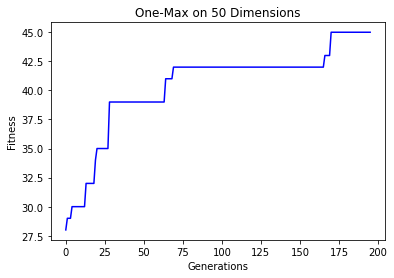

In [17]:
import matplotlib.pyplot as plt
plt.plot(fits, 'b')
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions");

In [18]:
n = 50
fits = one_plus_one(n, int(np.round(n * np.log(n)))*10, onemax)
print(fits[-1])

100%|██████████| 1960/1960 [00:00<00:00, 36607.99it/s]

50.0


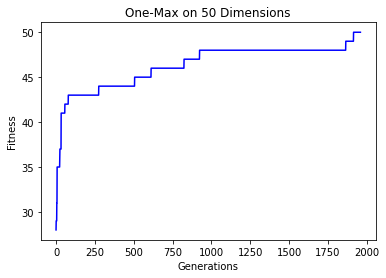

In [19]:
plt.plot(fits, 'b')
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions");

The Leading Ones problem is another benchmark function for EAs.
The Leading Ones function counts the number of 1-bits from left to right, stopping when the first 0-bit is found.

In [20]:
def leading_ones(ind: Individual):
    f = 0
    for i in range(len(ind.genes)):
        if not ind.genes[i]:
            f = i
            break
    return f
print(ind)
leading_ones(ind)

(Ind: [1 1 1 1 1 0 0 1 0 0], 6)


5

Question: What is the expected runtime of (1+1)-EA on the Leading Ones problem?

# (1+λ) Evolutionary Algorithm - (1+λ)-EA
- We made a small change to the (1+1)-EA: instead of generating one offspring individual each iteration (generation), we generate λ offspring individuals.
- These λ individuals can be called a population, and λ is the population size.

- For (1+λ)-EA, beside the mutation rate, the population size is another control parameter of the algorithm (i.e., hyperparameter).
- The expected runtime for (1+λ)-EA on OneMax is upper bounded by 
O(n
log
log
λ
/
log
λ
)
 when λ is larger than 
O
(
log
n
log
log
n
/
log
log
log
n
)
.

- We modify one_plus_one function to create the one_plus_lambda function.
- We keep track of the best offspring individual to compare it with the parent individual in the next generation.

In [21]:
def one_plus_lambda(ind_length: int, num_generations: int, objective, 𝜆: int):
    fits = np.zeros(num_generations)
    parent = Individual(ind_length)
    evaluate(parent, objective)
    
    for i in tqdm(range(len(fits))):
        population = [parent,]
        best = 0
        for j in range(1, 𝜆):
            population.append(mutate(parent))
            evaluate(population[j], objective) 
            if population[j].fitness > population[best].fitness:
                best = j
        if population[best].fitness >= parent.fitness:
            parent = population[best]
        fits[i] = parent.fitness
    return fits

In [22]:
n = 100
𝜆 = int(round(np.log(n)*np.log(np.log(n))/np.log(np.log(np.log(n)))))
print(𝜆)

17


Let's round up λ=20 for the sake of simplicity.

In [23]:
λ = 20

In [24]:
n = 100
n_gens = 1000
fits_1 = one_plus_one(n, n_gens, onemax)
fits_𝜆 = one_plus_lambda(n, n_gens, onemax, 𝜆)
fits_1[-1], fits_𝜆[-1]

 38%|███▊      | 376/1000 [00:00<00:00, 1251.54it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1284.88it/s]


(85.0, 95.0)

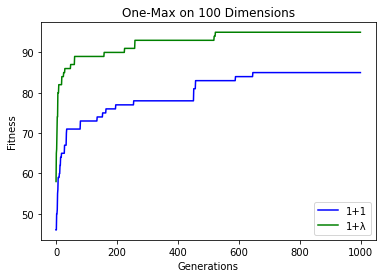

In [25]:
plt.plot(fits_1, label="1+1", color='b')
plt.plot(fits_𝜆, label="1+λ", color='g')
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions")
plt.legend()

- (1+λ)-EA seems to be better than (1+1)-EA. But is this a fair comparison?
- (1+λ)-EA actually runs λ evaluation functions per generation, while (1+1)-EA only runs 1 evaluation function per generation.
- We need to plot the results base on the number of evaluations.



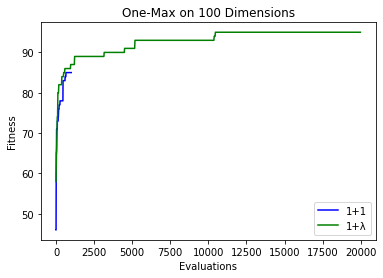

In [26]:
plt.plot(fits_1, label="1+1", color='b')
plt.plot(np.arange(1,n_gens*𝜆,𝜆), fits_𝜆, label="1+λ", color='g')
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions")
plt.legend();


- We should give each algorithm the same number of function evaluations, like this:

In [27]:
n = 1000
n_gens = 10000
fits_1 = one_plus_one(n, n_gens, onemax)
fits_𝜆 = one_plus_lambda(n, int(n_gens/𝜆), onemax, 𝜆)

100%|██████████| 500/500 [00:02<00:00, 200.70it/s]


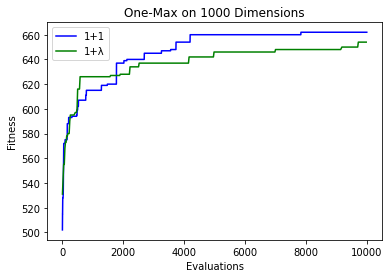

In [28]:
plt.plot(fits_1, label="1+1", color='b')
plt.plot(np.arange(1,n_gens,𝜆), fits_𝜆, label="1+λ", color='g')
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions")
plt.legend();

- Because EAs employ randomness in their operations, to assess the performance of EAs, we should run them multiple times.
- Let's run each algorithm 10 independent times.

In [29]:
n_trials = 10
n = 100
n_gens = 1000

fits_1 = np.zeros((n_gens, n_trials))
fits_𝜆 = np.zeros((int(n_gens/𝜆), n_trials))

for i in range(n_trials):
    fits_1[:, i] = one_plus_one(n, n_gens, onemax)
    fits_𝜆[:, i] = one_plus_lambda(n, int(n_gens/𝜆), onemax, 𝜆)

100%|██████████| 50/50 [00:00<00:00, 1253.72it/s]


In [30]:
μ_1 = np.mean(fits_1, axis=1)
σ_1 = np.std(fits_1, axis=1)
μ_𝜆 = np.mean(fits_𝜆, axis=1)
σ_𝜆 = np.std(fits_𝜆, axis=1)
print(np.shape(μ_1), np.shape(σ_1))
print(np.shape(μ_𝜆), np.shape(σ_𝜆))


(1000,) (1000,)
(50,) (50,)


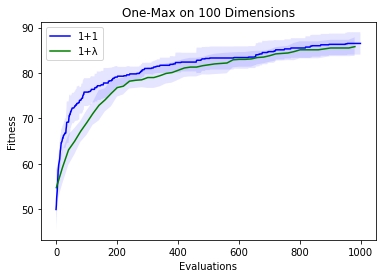

In [31]:
plt.plot(μ_1, label="1+1", color='b')
plt.fill_between(np.arange(0, n_gens), μ_1+σ_1, μ_1-σ_1, facecolor='b', alpha=0.1)
plt.plot(np.arange(1,n_gens,𝜆), μ_𝜆, label="1+λ", color='g')
plt.fill_between(np.arange(0, n_gens, 𝜆), μ_𝜆+σ_𝜆, μ_𝜆-σ_𝜆, facecolor='b', alpha=0.1)
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions")
plt.legend();

Question: Compare the (1+1)-EA and (1+λ)-EA on the Leading Ones problem.

## Algorithm control parameters
- In practice, the choice of mutation rate 
p
 and population size λ greatly influence experimental results.
- We can also use self-adjusting parameters, which is similar to what simulated annealing uses.

### Question:

- Investigave the effect of population size λ and mutation rate 
p
 on (1+1)-EA and (1+λ)-EA.
- Try implementing a dynamic mutation rate (e.g., a mutation rate that decreases over time) and compared it with the fixed mutation rate 
p
=
1
n
.

# Assignment


## Onemax problem

Define problem size, runtime


In [32]:
n_trials = 10
n = 20
n_gens = 1_000
𝜆 = 2

In [33]:

fits_1 = np.zeros((n_gens, n_trials))
fits_𝜆 = np.zeros((int(n_gens/𝜆), n_trials))

for i in range(n_trials):
    fits_1[:, i] = one_plus_one(n, n_gens, onemax)
    fits_𝜆[:, i] = one_plus_lambda(n, int(n_gens/𝜆), onemax, 𝜆)

100%|██████████| 500/500 [00:00<00:00, 43542.80it/s]


In [34]:
μ_1 = np.mean(fits_1, axis=1)
σ_1 = np.std(fits_1, axis=1)
μ_𝜆 = np.mean(fits_𝜆, axis=1)
σ_𝜆 = np.std(fits_𝜆, axis=1)
print(np.shape(μ_1), np.shape(σ_1))
print(np.shape(μ_𝜆), np.shape(σ_𝜆))


(1000,) (1000,)
(500,) (500,)


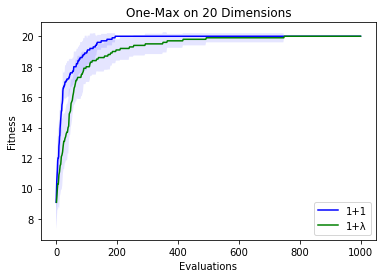

In [35]:
plt.plot(μ_1, label="1+1", color='b')
plt.fill_between(np.arange(0, n_gens), μ_1+σ_1, μ_1-σ_1, facecolor='b', alpha=0.1)
plt.plot(np.arange(1,n_gens,𝜆), μ_𝜆, label="1+λ", color='g')
plt.fill_between(np.arange(0, n_gens, 𝜆), μ_𝜆+σ_𝜆, μ_𝜆-σ_𝜆, facecolor='b', alpha=0.1)
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"One-Max on {n} Dimensions")
plt.legend();

## Leading Ones Problem

Define problem size, runtime


In [36]:
n_trials = 10
n = 20
n_gens = 1_000 
𝜆 = 10

In [37]:
fits_1 = np.zeros((n_gens, n_trials))
fits_𝜆 = np.zeros((int(n_gens/𝜆), n_trials))

for i in range(n_trials):
    fits_1[:, i] = one_plus_one(n, n_gens, leading_ones)
    fits_𝜆[:, i] = one_plus_lambda(n, int(n_gens/𝜆), leading_ones, 𝜆)

100%|██████████| 100/100 [00:00<00:00, 5350.15it/s]


100%|██████████| 100/100 [00:00<00:00, 6110.05it/s]


In [38]:
μ_1 = np.mean(fits_1, axis=1)
σ_1 = np.std(fits_1, axis=1)
μ_𝜆 = np.mean(fits_𝜆, axis=1)
σ_𝜆 = np.std(fits_𝜆, axis=1)
print(np.shape(μ_1), np.shape(σ_1))
print(np.shape(μ_𝜆), np.shape(σ_𝜆))

(1000,) (1000,)
(100,) (100,)


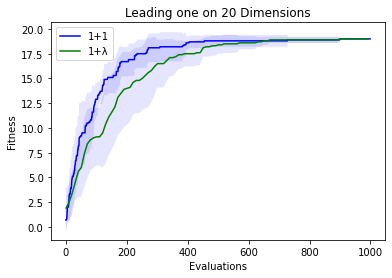

In [39]:
plt.plot(μ_1, label="1+1", color='b')
plt.fill_between(np.arange(0, n_gens), μ_1+σ_1, μ_1-σ_1, facecolor='b', alpha=0.1)
plt.plot(np.arange(1,n_gens,𝜆), μ_𝜆, label="1+λ", color='g')
plt.fill_between(np.arange(0, n_gens, 𝜆), μ_𝜆+σ_𝜆, μ_𝜆-σ_𝜆, facecolor='b', alpha=0.1)
plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.title(f"Leading one on {n} Dimensions")
plt.legend();

## Conclusions:
Based on the plot and the code, we can draw some conclusions:
- The "1+λ" strategy introduces more variability in fitness values due to the larger population size (λ). This can be seen as greater fluctuations in the green curve.
- The "1+1" strategy tends to achieve higher fitness values faster than the "1+λ" strategy, as shown by the faster initial increase in the blue curve.
- However, both strategies eventually converge to similar fitness levels, as indicated by the leveling off of both curves.
The "1+1" strategy has a more stable fitness progression, while the "1+λ" strategy exhibits more oscillations. This is expected because the "1+λ" strategy explores multiple solutions at once, leading to greater variability.
